In [1]:
from matplotlib import pyplot as plt
import yfinance as yf

# 下載台積電過去一年的股價數據
tsmc = yf.download("2330.tw", start="2023-01-01", end="2023-12-31")

[*********************100%%**********************]  1 of 1 completed


544.0
543.4518828451883


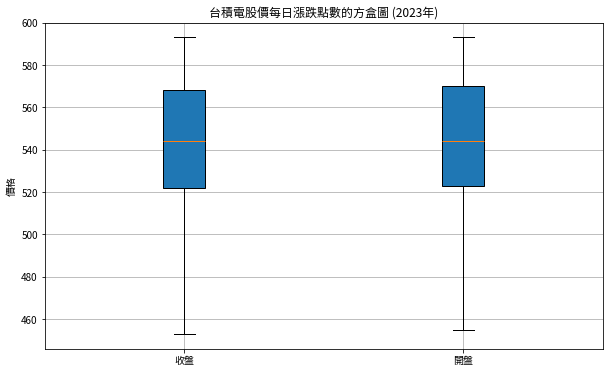

In [16]:
import numpy as np
import matplotlib
matplotlib.rc('font', family="Noto Sans TC")

print(np.median(tsmc.Close))
print(np.mean(tsmc.Close))

plt.figure(figsize=(10, 6))
plt.boxplot([tsmc.Close, tsmc.Open], showfliers=False, patch_artist=True)
plt.title('台積電股價每日漲跌點數的方盒圖 (2023年)')
plt.ylabel('價格')
plt.xticks([1, 2], ['收盤', '開盤'])
plt.grid()
plt.show()

In [17]:
tsmc["Change"] = tsmc.Close.diff()
tsmc["Status"] = tsmc.Change.apply(lambda x: "Up" if x > 0 else ("Down" if x < 0 else "Unchanged"))

In [19]:
tsmc.Status.value_counts()

Status
Up           114
Down         108
Unchanged     17
Name: count, dtype: int64

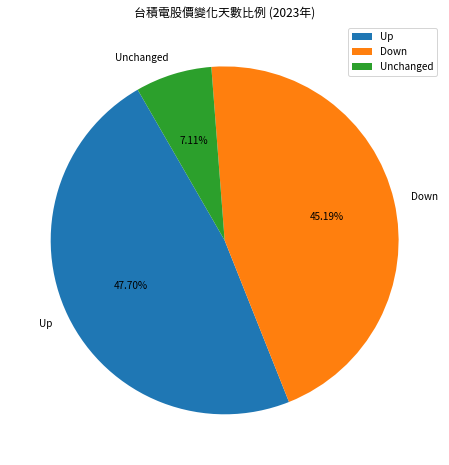

In [32]:
plt.figure(figsize=(8, 8))
plt.pie(tsmc.Status.value_counts(), autopct="%1.2f%%", 
        labels=tsmc.Status.value_counts().index, startangle=120)
plt.legend()
plt.title("台積電股價變化天數比例 (2023年)")
plt.savefig("fig.png")
plt.show()